## **Problem Statement**

Implement an 'eraser' on a canvas.

The canvas consists of a grid of blue 'cells' which are drawn as rectangles on the screen. We then create an eraser rectangle which, when dragged around the canvas, sets all of the rectangles it is in contact with to white.

## **Solution**

In [2]:
!pip install package-name


  Preparing metadata (setup.py) ... done
  Created wheel for package-name: filename=package_name-0.1-py3-none-any.whl size=1229 sha256=d3a04d6ad6094e8b4b140cbd5ec007d8bd7dfa30852bafaf75bea61efcdeb5cf
  Stored in directory: /root/.cache/pip/wheels/b3/c1/6f/538e951eb00f535f43151173b4c55e463a35c17b9e90ab3b1a
Successfully built package-name


In [4]:
!pip install matplotlib



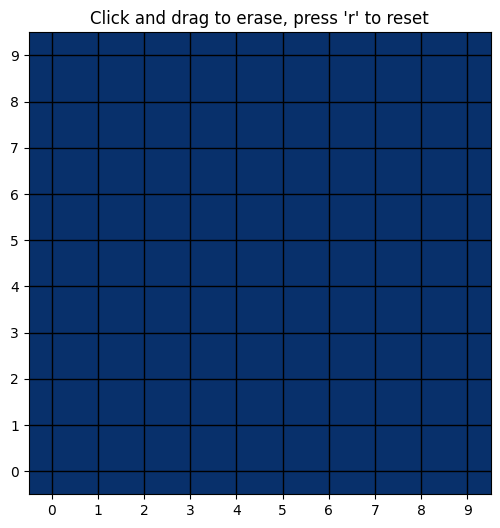

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
CANVAS_WIDTH = 400
CANVAS_HEIGHT = 400
CELL_SIZE = 40

NUM_ROWS = CANVAS_HEIGHT // CELL_SIZE
NUM_COLS = CANVAS_WIDTH // CELL_SIZE

# 2D grid where 1 means blue (filled), 0 means white (erased)
grid = np.ones((NUM_ROWS, NUM_COLS))

# Track dragging status
dragging = False

# Function to draw the grid
def draw_grid():
    plt.clf()
    plt.imshow(grid, cmap='Blues', vmin=0, vmax=1)
    plt.xticks(np.arange(NUM_COLS))
    plt.yticks(np.arange(NUM_ROWS))
    plt.grid(True, which='both', color='black', linewidth=1)
    plt.gca().invert_yaxis()
    plt.title("Click and drag to erase, press 'r' to reset")
    plt.pause(0.01)

# Mouse click event handler
def on_click(event):
    global dragging

    if event.inaxes is None:
        return

    col = int(event.xdata)
    row = int(event.ydata)

    if 0 <= row < NUM_ROWS and 0 <= col < NUM_COLS:
        grid[row, col] = 0  # Erase cell (set to white)
        draw_grid()
        dragging = True  # Start dragging

# Mouse motion event handler for dragging
def on_motion(event):
    global dragging

    if dragging and event.inaxes is not None:
        col = int(event.xdata)
        row = int(event.ydata)

        if 0 <= row < NUM_ROWS and 0 <= col < NUM_COLS:
            grid[row, col] = 0  # Erase cell (set to white)
            draw_grid()

# Mouse release event handler to stop dragging
def on_release(event):
    global dragging
    dragging = False  # Stop dragging

# Keyboard event to reset grid
def on_key(event):
    if event.key == 'r':  # Press 'r' to reset
        reset_grid()

# Function to reset the grid to all blue
def reset_grid():
    global grid
    grid = np.ones((NUM_ROWS, NUM_COLS))  # Set all cells to blue
    draw_grid()

# Set up the plot
fig = plt.figure(figsize=(6, 6))
draw_grid()

# Connect events
fig.canvas.mpl_connect('button_press_event', on_click)  # Click to start dragging
fig.canvas.mpl_connect('motion_notify_event', on_motion)  # Drag to erase
fig.canvas.mpl_connect('button_release_event', on_release)  # Release to stop dragging
fig.canvas.mpl_connect('key_press_event', on_key)  # Reset grid on 'r' key

plt.show()
